# Hava kakitesi tahmin modeli

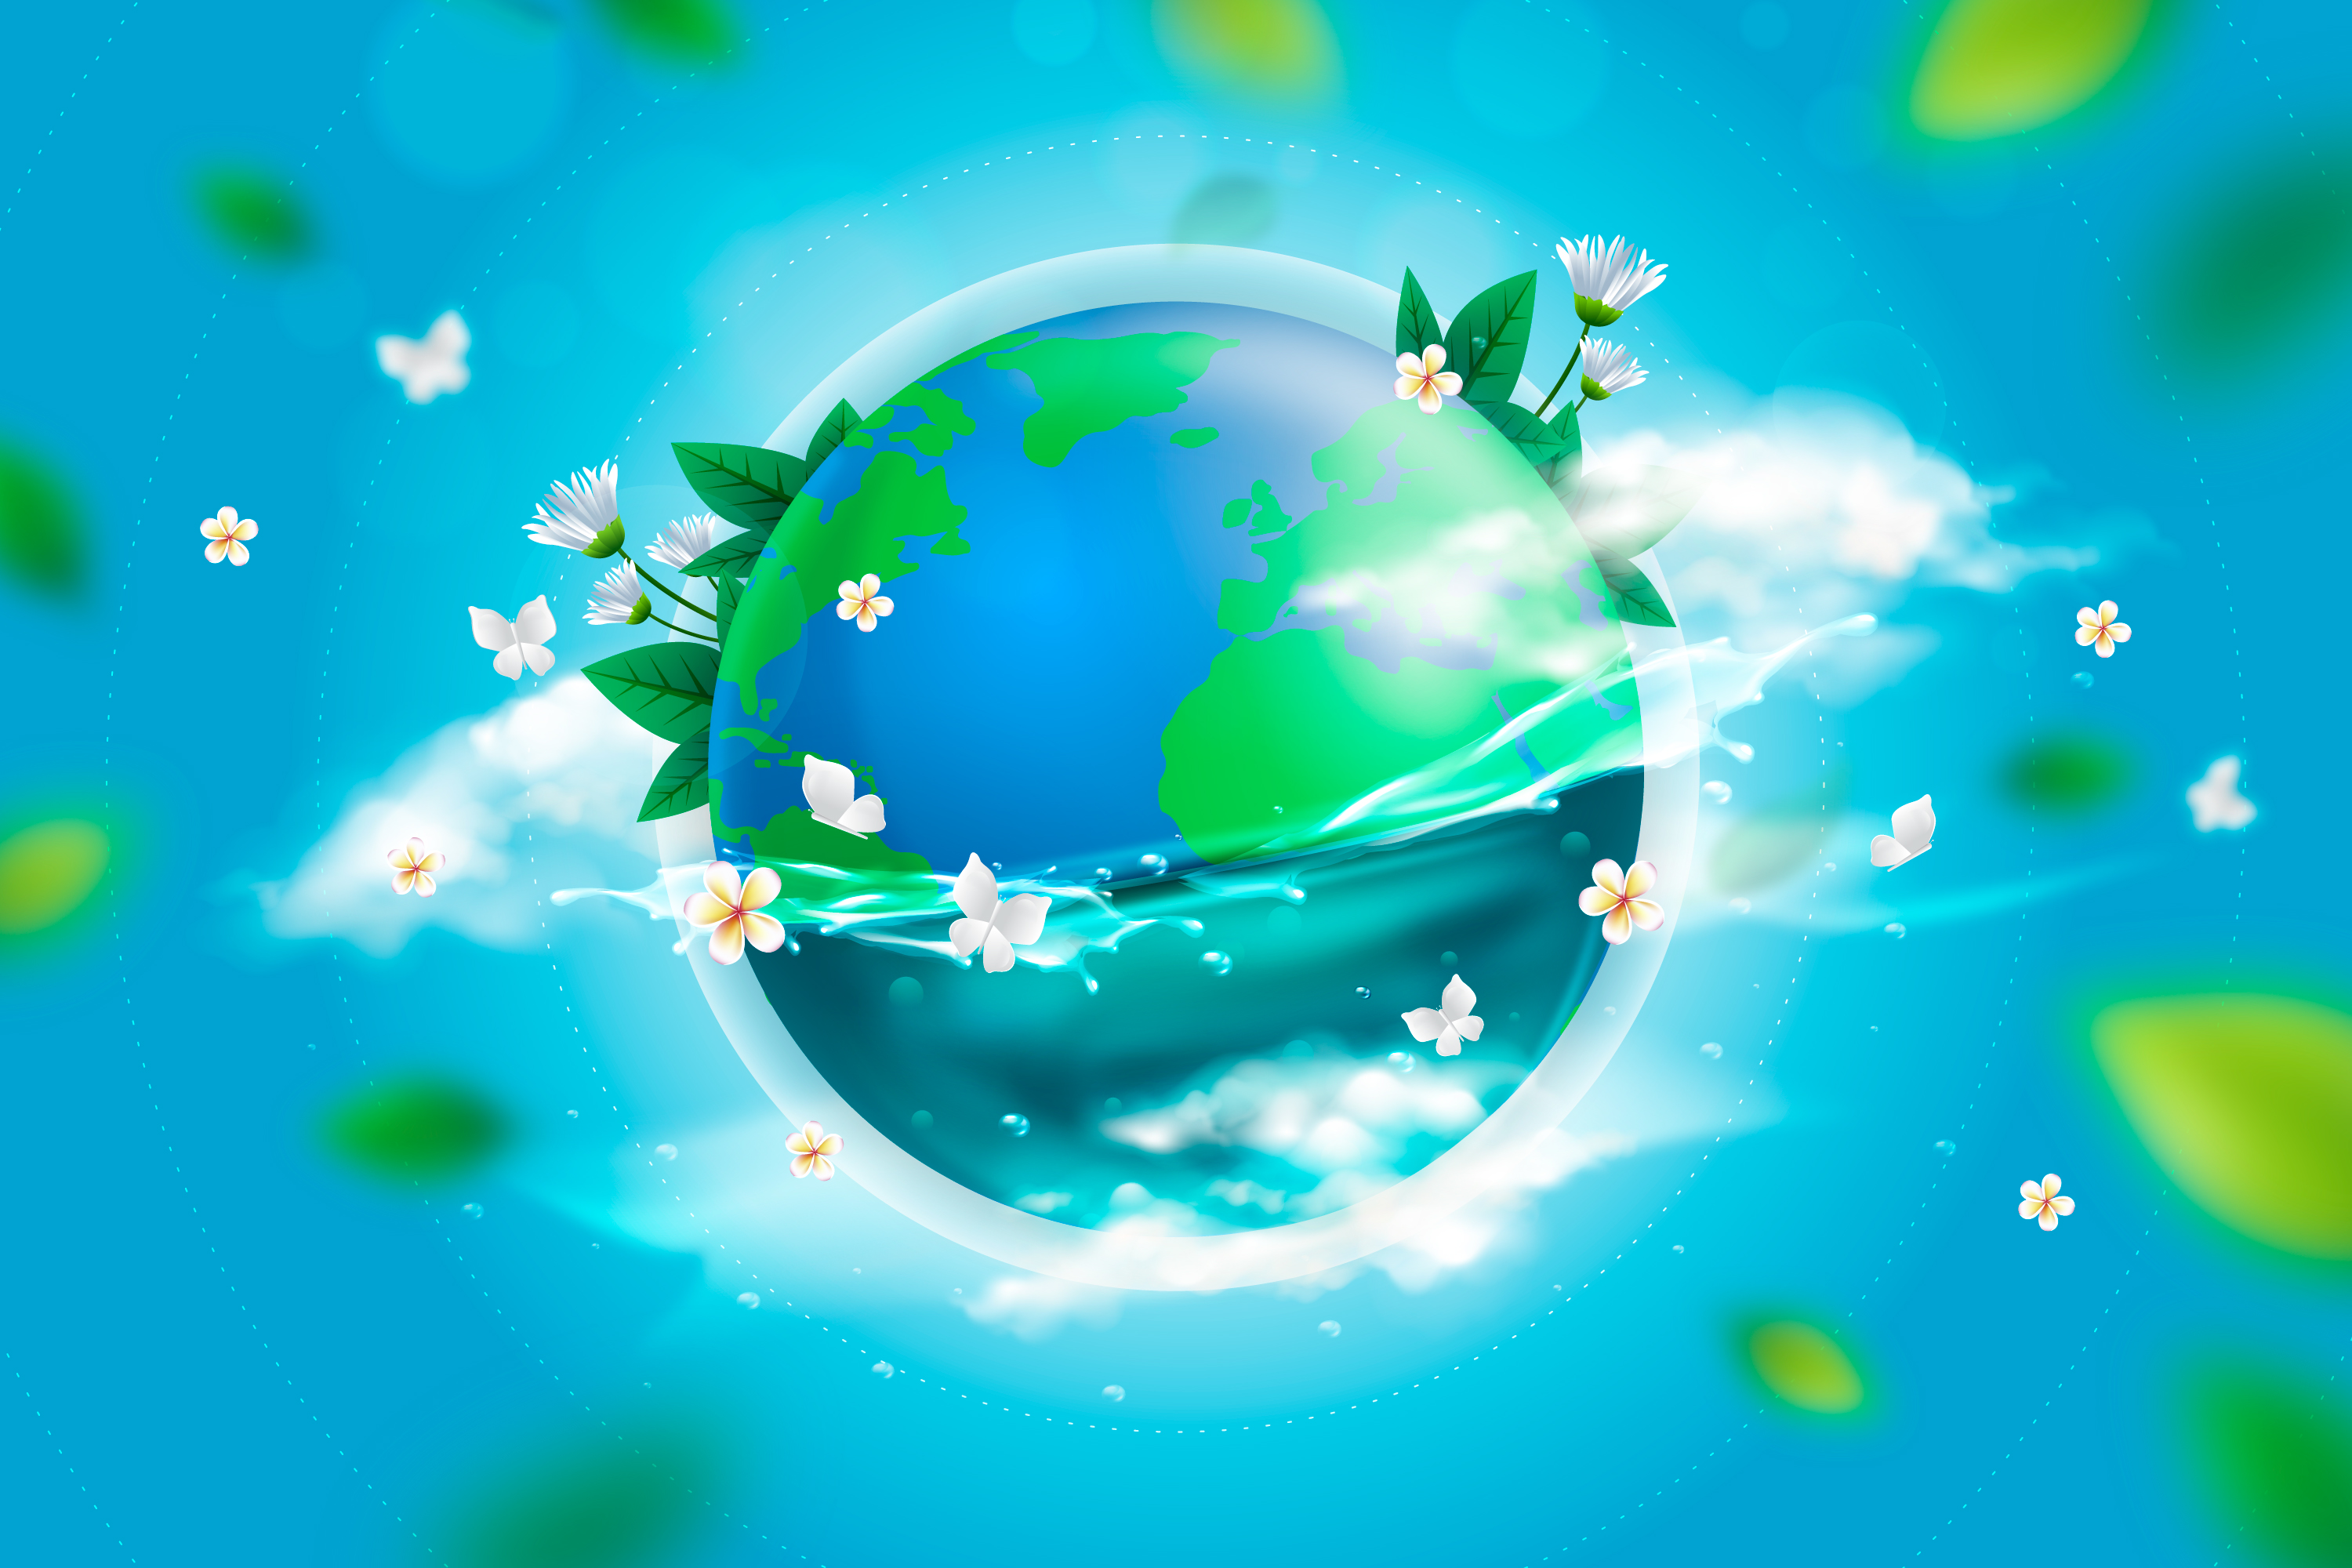

In [13]:
# Hava kalitesi değişim oranı üzerinden hesaplama yapan ve DNN kullanan bir projedir.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Veri setini yükleme
file_path = r'C:\Users\realb\Desktop\hava kaitesi modeli/air_quality_health_impact_data.csv'
data = pd.read_csv(file_path)

# Hedef değişken ve özelliklerin seçimi
X = data[['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed']]
y = data['HealthImpactScore']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standardize etme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# DNN modelini oluşturma
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
117/117 [==============================] - 1s 2ms/step - loss: 7743.3442 - val_loss: 3768.2988
Epoch 2/100
117/117 [==============================] - 0s 1ms/step - loss: 765.7162 - val_loss: 236.4172
Epoch 3/100
117/117 [==============================] - 0s 1ms/step - loss: 228.1514 - val_loss: 211.6852
Epoch 4/100
117/117 [==============================] - 0s 1ms/step - loss: 206.2398 - val_loss: 194.8060
Epoch 5/100
117/117 [==============================] - 0s 992us/step - loss: 189.6688 - val_loss: 179.9832
Epoch 6/100
117/117 [==============================] - 0s 1ms/step - loss: 176.8706 - val_loss: 168.2517
Epoch 7/100
117/117 [==============================] - 0s 1ms/step - loss: 166.1215 - val_loss: 160.5467
Epoch 8/100
117/117 [==============================] - 0s 1ms/step - loss: 156.4448 - val_loss: 152.6619
Epoch 9/100
117/117 [==============================] - 0s 1ms/step - loss: 147.6364 - val_loss: 143.9097
Epoch 10/100
117/117 [=============================

117/117 [==============================] - 0s 1ms/step - loss: 0.0571 - val_loss: 0.0592
Epoch 81/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0583 - val_loss: 0.1493
Epoch 82/100
117/117 [==============================] - 0s 1ms/step - loss: 0.1016 - val_loss: 0.1880
Epoch 83/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0929 - val_loss: 0.0773
Epoch 84/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0488
Epoch 85/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0419 - val_loss: 0.0598
Epoch 86/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0275 - val_loss: 0.0339
Epoch 87/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0610 - val_loss: 0.2104
Epoch 88/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0657 - val_loss: 0.0829
Epoch 89/100
117/117 [==============================] - 0s 1ms/step - loss: 0.0334 - val_loss: 

In [5]:
# Tahminler yapma
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

37/37 [==============================] - 0s 611us/step


In [6]:
# Model performansını değerlendirme
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [7]:
# Sonuçları yazdırma
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

Train MSE: 0.022827831480507793
Test MSE: 0.031500102297611986
Train R2 Score: 0.9998693798974297
Test R2 Score: 0.9998318792984584


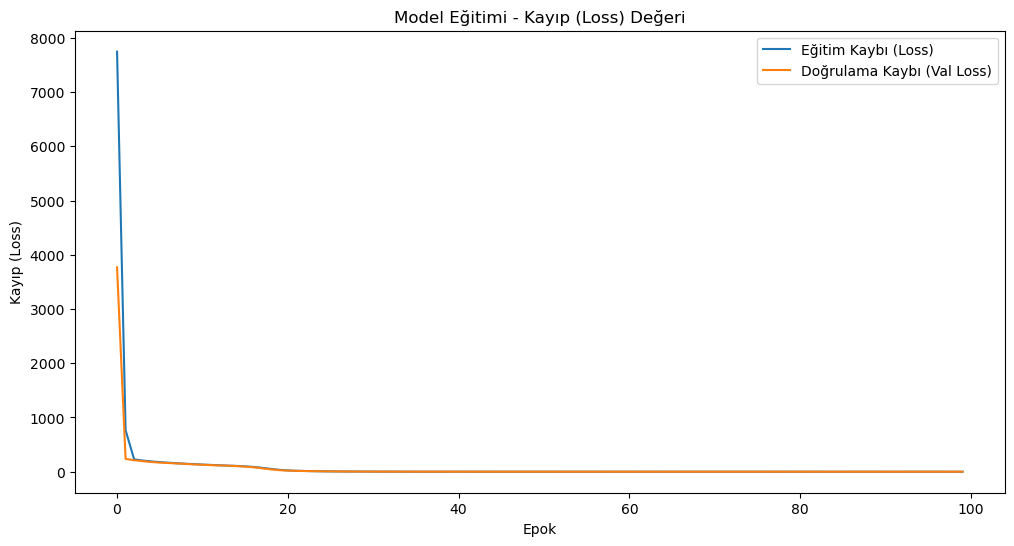

In [8]:
# Eğitim kaybını (loss) görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı (Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı (Val Loss)')
plt.title('Model Eğitimi - Kayıp (Loss) Değeri')
plt.xlabel('Epok')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.show()

In [9]:
# Tahminleri bir DataFrame'de toplama
results_df = pd.DataFrame({
    'Gerçek Değerler': y_test,
    'Tahmin Edilen Değerler': y_test_pred.flatten()
})

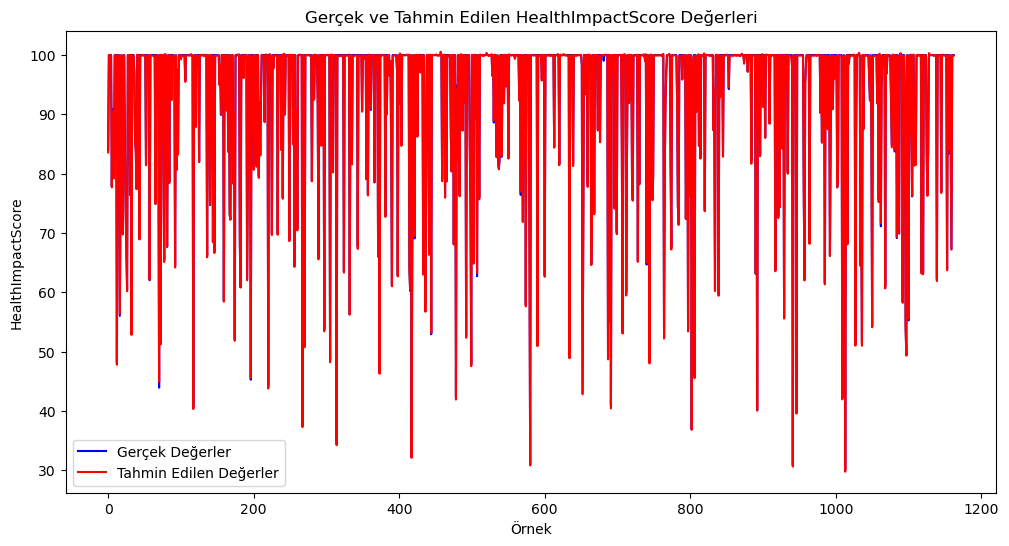

In [10]:
# Tahminler ve gerçek değerlerin görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.plot(results_df['Gerçek Değerler'].values, label='Gerçek Değerler', color='blue')
plt.plot(results_df['Tahmin Edilen Değerler'].values, label='Tahmin Edilen Değerler', color='red')
plt.title('Gerçek ve Tahmin Edilen HealthImpactScore Değerleri')
plt.xlabel('Örnek')
plt.ylabel('HealthImpactScore')
plt.legend()
plt.show()

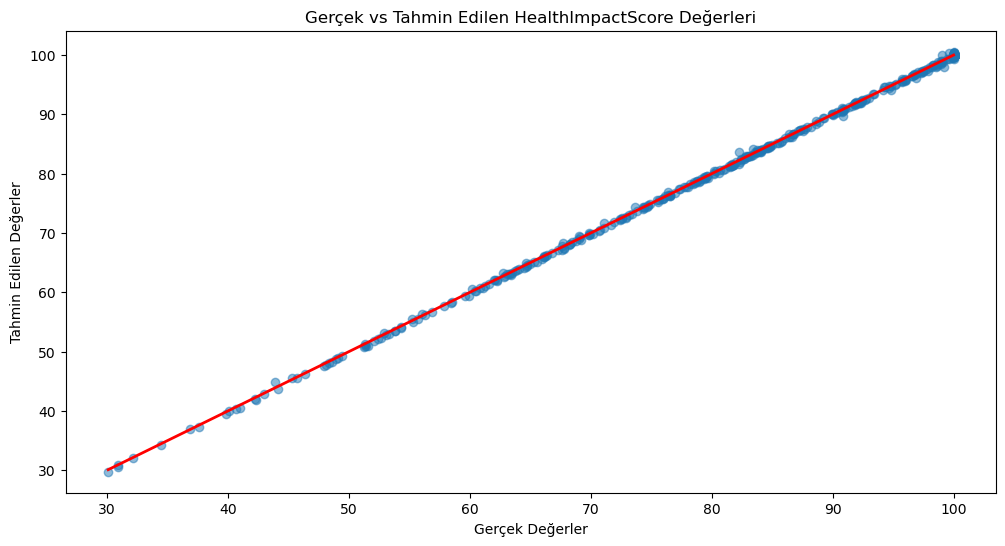

In [11]:
# Dağılım grafiği
plt.figure(figsize=(12, 6))
plt.scatter(results_df['Gerçek Değerler'], results_df['Tahmin Edilen Değerler'], alpha=0.5)
plt.title('Gerçek vs Tahmin Edilen HealthImpactScore Değerleri')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.plot([results_df['Gerçek Değerler'].min(), results_df['Gerçek Değerler'].max()],
         [results_df['Gerçek Değerler'].min(), results_df['Gerçek Değerler'].max()],
         color='red', lw=2)
plt.show()

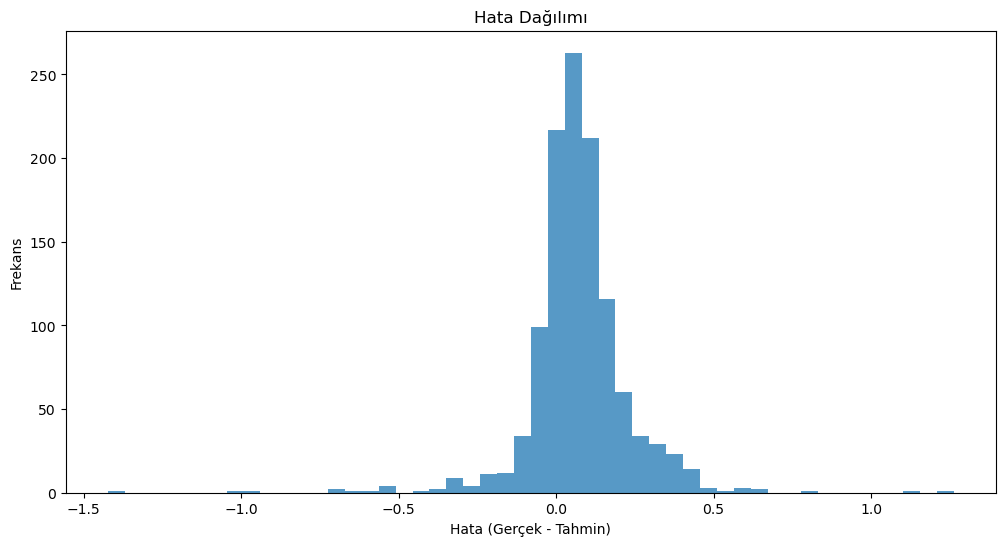

In [12]:
# Hata dağılımı
errors = results_df['Gerçek Değerler'] - results_df['Tahmin Edilen Değerler']
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=50, alpha=0.75)
plt.title('Hata Dağılımı')
plt.xlabel('Hata (Gerçek - Tahmin)')
plt.ylabel('Frekans')
plt.show()